In [1]:
import numpy as np
test_x = np.load('x_test05.npy')
test_y = np.load('y_test05.npy')


In [3]:
dt = 0.1
measurements = np.array(test_x)

measurement_noise = 0.05# Measurement noise covariance
process_noise = 0.05  # Process noise covariance


  
from filterpy.kalman import KalmanFilter

estimated_positions_x = []

# Create a Kalman filter instance
kf = KalmanFilter(dim_x=2, dim_z=1)

# Define the state transition matrix
kf.F = np.array([[1, dt],
                 [0, 1]])

# Define the measurement matrix
kf.H = np.array([[1, 0]])

# Define the measurement noise covariance
kf.R = np.array([[measurement_noise]])

kf.Q = np.array([[0.25 * dt**4, 0.5 * dt**3],
                 [0.5 * dt**3, dt**2]]) * process_noise

# Initialize the state estimate
initial_position = measurements[0]
initial_velocity = (measurements[1] - measurements[0])*0.1
kf.x = np.array([[initial_position],
                 [initial_velocity]])

# Initialize the covariance estimate
kf.P = np.eye(2)

# Perform filtering
estimated_positions = []
for measurement in measurements:
    # Predict step
    kf.predict()

    # Update step
    kf.update(np.array([[measurement]]))

    # Get the estimated position
    estimated_position = kf.x[0, 0]
    estimated_positions_x.append(estimated_position)

# Print the estimated positions
for i, position in enumerate(estimated_positions_x):
    print(f"Step {i+1}: {position}")


Step 1: 124.99952830244304
Step 2: 124.45605989397632
Step 3: 123.23173012112613
Step 4: 121.9404759842912
Step 5: 119.7293799538441
Step 6: 117.88995602888855
Step 7: 117.16800561040515
Step 8: 116.75966962011479
Step 9: 116.89186476588377
Step 10: 117.36163561965644
Step 11: 118.0450612987581
Step 12: 118.57841069661652
Step 13: 118.73031868705536
Step 14: 118.85838979345121
Step 15: 118.72741847771533
Step 16: 117.94581708746092
Step 17: 117.7498274859986
Step 18: 117.38967497805531
Step 19: 117.49352704732958
Step 20: 117.96880683710074
Step 21: 118.01331595135073
Step 22: 117.70385110556408
Step 23: 117.44231019828416
Step 24: 117.38687886365061
Step 25: 117.50605455907937
Step 26: 117.45980662630403
Step 27: 118.03954075633874
Step 28: 117.80798504293993
Step 29: 118.63925045564524
Step 30: 119.53554544974581
Step 31: 120.63193985500396
Step 32: 121.4818878040927
Step 33: 122.94779794696927
Step 34: 124.13786540961814
Step 35: 122.88106452746493
Step 36: 122.6658276063593
Step 37

In [5]:
estimated_positions_y = []
measurements = test_y
# Create a Kalman filter instance
kf = KalmanFilter(dim_x=2, dim_z=1)

# Define the state transition matrix
kf.F = np.array([[1, dt],
                 [0, 1]])

# Define the measurement matrix
kf.H = np.array([[1, 0]])

# Define the measurement noise covariance
kf.R = np.array([[measurement_noise]])

kf.Q = np.array([[0.25 * dt**4, 0.5 * dt**3],
                 [0.5 * dt**3, dt**2]]) * process_noise

# Initialize the state estimate
initial_position = measurements[0]
initial_velocity = (measurements[1] - measurements[0])*0.1
kf.x = np.array([[initial_position],
                 [initial_velocity]])

# Initialize the covariance estimate
kf.P = np.eye(2)

# Perform filtering
estimated_positions = []
for measurement in measurements:
    # Predict step
    kf.predict()

    # Update step
    kf.update(np.array([[measurement]]))

    # Get the estimated position
    estimated_position = kf.x[0, 0]
    estimated_positions_y.append(estimated_position)

# Print the estimated positions
for i, position in enumerate(estimated_positions_y):
    print(f"Step {i+1}: {position}")

Step 1: 27.003773580455682
Step 2: 31.351520848189523
Step 3: 31.14640935143744
Step 4: 32.77489345189914
Step 5: 32.41474297061969
Step 6: 35.618097294975904
Step 7: 38.95274518801336
Step 8: 43.82802860177618
Step 9: 49.979308472837815
Step 10: 54.9278210847208
Step 11: 59.97006091661539
Step 12: 66.50191737673313
Step 13: 74.06983449535072
Step 14: 79.32208686546815
Step 15: 86.70240273985804
Step 16: 90.89604488064424
Step 17: 95.68109225687317
Step 18: 101.75341782576922
Step 19: 107.25835464910053
Step 20: 112.49779609011016
Step 21: 117.52142566967304
Step 22: 123.78028085744188
Step 23: 129.69696309305405
Step 24: 133.9992812293747
Step 25: 138.06324139659566
Step 26: 140.5079458786543
Step 27: 148.6292822798307
Step 28: 153.85486582908084
Step 29: 160.82920711506756
Step 30: 167.0195666138037
Step 31: 172.36939394494297
Step 32: 177.81606349872882
Step 33: 186.28406237580768
Step 34: 194.9856377105103
Step 35: 201.56127228659213
Step 36: 207.15087870520165
Step 37: 213.4628900

In [6]:
kalman_x = np.array(estimated_positions_x)
kalman_y = np.array(estimated_positions_y)

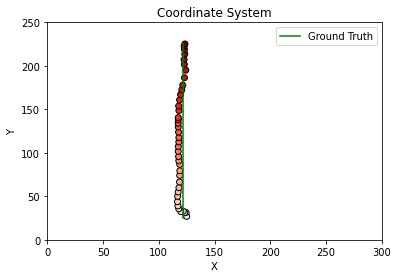

In [7]:
import matplotlib.pyplot as plt

x_values = kalman_x
y_values = kalman_y

# Create a scatter plot of the coordinates
plt.scatter(x_values, y_values, c=range(len(x_values)), cmap='Reds', edgecolors='black')

# Set the x and y axis labels
plt.xlabel('X')
plt.ylabel('Y')

# Set the title of the plot
plt.title('Coordinate System')

plt.plot([122, 122], [25, 225], color='green', label='Ground Truth')


plt.legend()

plt.xlim(0, 300)
plt.ylim(0, 250)



# Display the plot
plt.show()

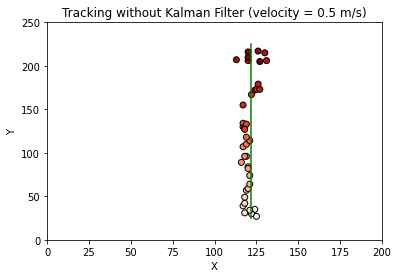

In [8]:
import matplotlib.pyplot as plt

x_values = test_x
y_values = test_y

# Create a scatter plot of the coordinates
plt.scatter(x_values, y_values, c=range(len(x_values)), cmap='Reds', edgecolors='black')

# Set the x and y axis labels
plt.xlabel('X')
plt.ylabel('Y')

# Set the title of the plot
plt.title('Tracking without Kalman Filter (velocity = 0.5 m/s)')

plt.xlim(0, 200)
plt.ylim(0, 250)

plt.plot([122, 122], [25, 225], color='green', label='Ground Truth')

# Display the plot
plt.show()